In [1]:
import datajoint as dj

In [2]:
schema = dj.Schema('app1')

[2023-09-30 19:57:38,362][INFO]: Connecting root@fakeservices.datajoint.io:3306
[2023-09-30 19:57:38,417][INFO]: Connected root@fakeservices.datajoint.io:3306


In [4]:
@schema
class UserAccount(dj.Manual):
    definition = """
    phone      : bigint unsigned 
    ---
    first_name : varchar(40)
    last_name : varchar(40)

"""

In [6]:
@schema
class CreditCard(dj.Manual):
    definition = """
    card_number :  bigint unsigned 
    ---
    exp_date : date 
    cvc      : smallint unsigned
    zipcode  : int unsigned       
    -> UserAccount
    """

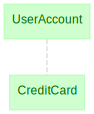

In [7]:
dj.Diagram(schema)

In [8]:
from faker import Faker
fake = Faker()

In [9]:
@schema
class AddOn(dj.Lookup):
    definition = """
    addon_id : int
    ---
    addon_name : varchar(40)
    price : decimal(5, 2) unsigned
    """

    contents = ((1, "Track & Field", 13.99), (2, "Marathon", 26.2), (3, "Sprint", 100.00))

In [11]:
AddOn()

addon_id,addon_name,price
1,Track & Field,13.99
2,Marathon,26.20
3,Sprint,100.00


In [12]:
@schema
class Purchase(dj.Manual):
    definition = """
   -> UserAccount
   -> AddOn
   ---
   -> CreditCard
   """

In [13]:
CreditCard()

card_number,exp_date,cvc,zipcode,phone


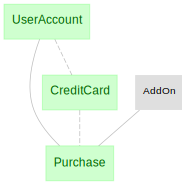

In [14]:
dj.Diagram(schema)

In [16]:
UserAccount.insert(dict(
    phone=fake.random_int(1_000_000_0000, 9_999_999_9999),
    first_name=fake.first_name(),
    last_name=fake.last_name()) for _ in range (1000))

In [17]:
UserAccount()

phone,first_name,last_name
10105559866,David,Morales
10151006223,Ronald,Davis
10180965472,Jason,Shepard
10191768721,Miranda,Rivera
10257449331,Jason,Hall
10312998893,Melissa,Torres
10459469823,Rachael,Campbell
10593216525,Brian,Ross
10612449633,Andrea,Medina
10641530971,Lisa,Rogers


In [18]:
CreditCard()

card_number,exp_date,cvc,zipcode,phone


In [19]:
keys = UserAccount.fetch('KEY')

In [20]:
import random

In [21]:
fake.credit_card_number()

'4064469806717'

In [22]:
CreditCard.insert(
    dict(random.choice(keys), 
         zipcode=random.randint(10000,99999), 
         card_number=int(fake.credit_card_number()),
         cvc=random.randint(1, 999), 
         exp_date=fake.future_date()) for _ in range(15000))

In [24]:
CreditCard()

card_number,exp_date,cvc,zipcode,phone
60400769323,2023-10-05,732,98853,92100271079
60403154580,2023-10-02,360,52689,88880682974
60404573507,2023-10-27,844,62259,44665961248
60404748844,2023-10-08,128,88686,27152530383
60406238372,2023-10-25,737,54954,16054112949
60406291892,2023-10-22,967,91628,52620753519
60406605836,2023-10-09,883,58591,27600082893
60409124074,2023-10-05,630,59846,81257694607
60410658987,2023-10-05,414,44674,56119555011
60411186483,2023-10-17,908,21502,52493853256


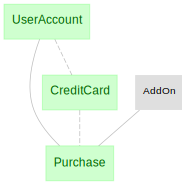

In [25]:
dj.Diagram(schema)